---
### Setup
* create a virtual environment
* run `pip install jupyter`
* Set Up Jupyter Kernel: `python -m ipykernel install --user --name=venv --display-name "data-analysis (venv)"
* Select this kernel

In [179]:
# Copy the data out files from the raspberry pi to the data folder with a shell command - SH: command not tested! 
# !scp pi@lohast-IPAdresss:/root/presist/overlay/data/out /data/out

---
## Notebook for `berries` power analysis of all 

---
### Read Data: Read the Data from the `data` folder into the `data_dict` variable
* Reads the data from the `data/out` directory
* Saves the data to the `data_dict` variable

In [180]:
import os
import pandas as pd

SERVICES  = ['rust-actix', 'ruby-sinatra', 'python-flask', 'go-gorilla'] # 'python-flask', 'go-gorilla', 
base_dir = 'data/out'
dir_out = 'plots/'
data_dict = {}

for service in SERVICES:
    
    service_dir = os.path.join(base_dir, service, 'berries')
    if not os.path.exists(service_dir):
        print(f"Directory does not exist: {service_dir}")
        continue
        
    # iterates of files in service_dir    
    for file_name in os.listdir(service_dir):
        file_path = os.path.join(service_dir, file_name)
            
        # Read the CSV files based on their naming convention
        if file_name.endswith(".csv"):
            if "power" in file_name:
                df_power = pd.read_csv(file_path)
                df_power = df_power[df_power['iteration'] != 0]
                
                # Calculate timedelta and energy for each row
                grouped = df_power.groupby('iteration')
                df_power['timedelta'] = grouped['timestamp'].diff()
                df_power['timedelta'] = df_power['timedelta'].fillna(0)
                df_power['energy'] = grouped.apply(
                    lambda group: group['power'] * group['timedelta']
                ).reset_index(level=0, drop=True)
                df_power['energy'] = df_power['energy'].fillna(0)
                
                # Calculate cumulative energy per iteration
                df_power['cumulative_energy'] = grouped['energy'].cumsum()
                
                # Create timedelta index
                df_power['timedelta_index'] = df_power.groupby('iteration')['timestamp'].diff().fillna(0).cumsum()
                df_power.set_index('timedelta_index', inplace=True)
                df_power.sort_index(inplace=True)

                # Store DataFrame in data_dict
                data_dict[service] = df_power
            else:
                print("dataframe power does not exist")
                
# discard iteration 0 
for service in SERVICES:
    data_dict[service] = data_dict[service][data_dict[service]['iteration'] != 0]


/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_63120/4199417987.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(
/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_63120/4199417987.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_power['energy'] = grouped.apply(
/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_63120/4199417987.py:3

In [181]:
# Filter the DataFrame for rows where iteration is 1 or 2
df_ruby_sinatra = data_dict['ruby-sinatra']
filtered_df = df_ruby_sinatra[df_ruby_sinatra['iteration'].isin([1, 2])]

# Sort by timedelta_index to ensure the rows are ordered correctly
filtered_df = filtered_df.sort_index()

# Display rows around the transition from iteration 1 to 2
transition_rows = filtered_df[filtered_df['iteration'].diff() == 1]

print("Rows where iteration transitions from 1 to 2:")
print(transition_rows)

# Display the surrounding rows (for context)
print("\nContext around the transition:")
context_rows = filtered_df.loc[transition_rows.index[0] - 2:transition_rows.index[0] + 2]
print(context_rows)

Rows where iteration transitions from 1 to 2:
                    timestamp     power   current   voltage  iteration  \
timedelta_index                                                          
32.02198         1.733691e+09  3.050921  0.586709  5.200059          2   

                 timedelta  energy  cumulative_energy  
timedelta_index                                        
32.02198               0.0     0.0                0.0  

Context around the transition:
                    timestamp     power   current   voltage  iteration  \
timedelta_index                                                          
30.02198         1.733691e+09  3.039611  0.584545  5.199956          1   
30.02200         1.733691e+09  3.039247  0.584480  5.199915          1   
30.02202         1.733691e+09  3.040096  0.584646  5.199895          1   
30.02204         1.733691e+09  3.039946  0.584614  5.199915          1   
30.02206         1.733691e+09  3.041820  0.584964  5.200011          1   
...          

In [182]:
# check applications in data_dict
print("applications in data_dict:")
print(data_dict.keys())
print("dataframe:")
data_dict['ruby-sinatra'][data_dict['ruby-sinatra']['iteration'] == 2]

# Energy accumulated over time

applications in data_dict:
dict_keys(['rust-actix', 'ruby-sinatra', 'python-flask', 'go-gorilla'])
dataframe:


,timestamp,power,current,voltage,iteration,timedelta,energy,cumulative_energy
timedelta_index,,,,,,,,
32.02198,1.733691e+09,3.050921,0.586709,5.200059,2,0.00000,0.000000,0.000000
32.02200,1.733691e+09,3.051605,0.586849,5.199984,2,0.00002,0.000061,0.000061
32.02202,1.733691e+09,3.053013,0.587108,5.200086,2,0.00002,0.000061,0.000122
32.02204,1.733691e+09,3.054453,0.587383,5.200103,2,0.00002,0.000061,0.000183
32.02206,1.733691e+09,3.054065,0.587307,5.200114,2,0.00002,0.000060,0.000244
...,...,...,...,...,...,...,...,...
62.93388,1.733691e+09,3.054425,0.587283,5.200938,2,0.00002,0.000061,99.005145
62.93390,1.733691e+09,3.064716,0.589290,5.200692,2,0.00002,0.000061,99.005206
62.93392,1.733691e+09,3.075001,0.591277,5.200610,2,0.00002,0.000061,99.005267


---
### Helper functions for data pipline sequential analysis

In [195]:
from datetime import datetime

# Helper functions for data pipline sequential analysis

def customize_boxplot(bplot, colors, tick_color, median_color):
    """
    Helper function to customize the appearance
    """
    # Customize the box colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set(color=color, linewidth=1.5)  # Set box outline color and line width
        patch.set(facecolor=color, alpha=0.8)  # Fill the box with the specified color

    # Customize the whiskers
    for whisker in bplot['whiskers']:
        whisker.set(color=tick_color, linewidth=1.5)  # Set whisker color and line width

    # Customize the caps
    for cap in bplot['caps']:
        cap.set(color=tick_color, linewidth=1.5)  # Set cap color and line width

    # Customize the medians
    for median in bplot['medians']:
        median.set(color=median_color, linewidth=1.5)  # Set median line color
        
        
def save_plot(fig, weact_service, plot_type="sequential", filename_suffix="energy"):
    """
    Save a plot to a specific directory with a timestamped filename.
    """
    if plot_type == "compare-berries":
        dir_out = f'plots/{plot_type}'
    else:
        dir_out = f'plots/{weact_service}/{plot_type}'
        
    current_time = datetime.now().strftime("%Y-%m-%d_%H:%M")  # Format: YYYY-MM-DD_HH
    # Create the directory if it doesn't exist
    os.makedirs(dir_out, exist_ok=True)
    
    # Save the figure
    fig.savefig(
        os.path.join(dir_out, f"{weact_service}_{filename_suffix}_{current_time}.png"),
        bbox_inches='tight',
        dpi=150,
        facecolor='white'
    )
    print(f"Plot for {weact_service} ({plot_type}) saved as {filename_suffix} at {dir_out}")
    

def define_title_xlable_ylable_line_chart(analyse):
    """
    Define title, x-label and y-label based on the comparison of
    """
    if analyse == 'power':
        title = 'Power Consumption by by Language & Framework'
        y_label = 'Power (W)'
    elif analyse == 'delta':
        title = 'Execution Time by Language & Framework'
        y_label = 'Time (s)'
    elif 'cumulative_energy':
        title = 'Energy Spent Over Time by Language & Framework'
        y_label = 'Energy (J)'
    else:
        print("No valid metric defined")
    x_label = 'Time (s)'
    return title, x_label, y_label

def define_title_xlable_ylable_boxplot(analyse):
    """
    Define title, x-label and y-label based on the comparison of
    """
    if analyse == 'power':
        title = 'Power Consumption by by Language & Framework'
        y_label = 'Power (W)'
    elif analyse == 'running_time':
        title = 'Execution Time by Language & Framework'
        y_label = 'Time (s)'
    elif analyse == 'energy':
        title = 'Energy by by Language & Framework'
        y_label = 'Energy (J)'
    x_label = 'Language & Framework'
    return title, x_label, y_label


flierprops = {
        'marker': 'o',
        'markerfacecolor': '#D7B0FF',
        'markeredgecolor': '#978AB5',
        'markersize': 2,
        'linestyle': 'none',
        'alpha': 0.2,
}

---
### Line Chart: Power Consumption Over Time for a Single Application Run

* This step plots a single application run's power consumption over time.
* plots the defined metric for all endpoints for a single service


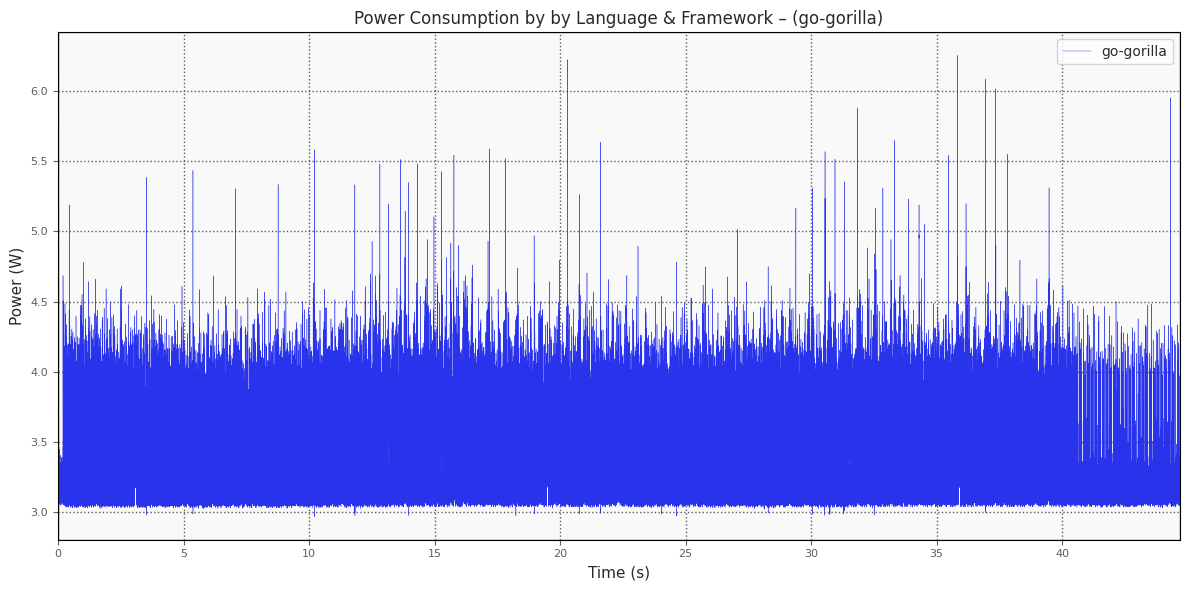

In [184]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

waect_service = 'go-gorilla' # define service to be ploted
metric = 'power' # define metric to be ploted `power` and `energy`
df = data_dict[waect_service][data_dict[waect_service]['iteration'] == 1]

# settings for this plot
labels_fontsize = 11
labels_fontcolor = "#2A2A2A"
title_fontsize = 12
tick_color = "#5D5D5D"

# Plot single run power consumption
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
fig.patch.set_facecolor('#FFFFFF') 
ax.set_facecolor('#F9F9F9')

ax.plot(
    df.index,
    df[metric],
    linewidth=0.3,
    color='#2933EB'
)

# only if cumulative energy is polotted
if metric == 'cumulative_energy':
    ax.fill_between(
        df.index,
        df[metric],
        color='#2933EB',
        alpha=0.3 
    )
    
# Set title and labels
title, x_label, y_label = define_title_xlable_ylable_line_chart(metric)

ax.grid(True, linestyle='dotted', linewidth=1, color=tick_color)  # Setting custom grid color
ax.set_title(f'{title} – ({waect_service})', color=labels_fontcolor, fontsize=title_fontsize)  # Set an appropriate title
ax.set_xlabel(f"{x_label}", color=labels_fontcolor, fontsize=labels_fontsize,)  # Set an appropriate label for the x-axis
ax.set_ylabel(f"{y_label}", color=labels_fontcolor, fontsize=labels_fontsize)  # Label for the y-axis
ax.tick_params(labelsize=8, color=tick_color, labelcolor=tick_color)
ax.autoscale(enable=True, axis="x", tight=True)

border = Rectangle(
    (0, 0), 1, 1,
    transform=ax.transAxes,
    facecolor='none',
    edgecolor=tick_color,
    linewidth=1.0  
)

ax.add_patch(border)
    
ax.legend([waect_service], loc='upper right', fontsize=10, labelcolor=labels_fontcolor,facecolor="white", framealpha=0.8)
plt.tight_layout()
plt.show()

In [185]:
# Save the plot
save_plot(fig, waect_service, "berries", metric)

Plot for go-gorilla (berries) saved as power at plots/go-gorilla/berries


---
### Line Chart: Power Consumption Over Time for two applications runs

In [186]:
reindexed_data_dict = {}

SERVICES = ['go-gorilla', 'rust-actix', 'ruby-sinatra', 'python-flask']  # Define the services to compare

# Determine the union of all timedelta_index values across the services
all_timedelta_indices = set()
for service in SERVICES:
    original_df = data_dict[service]
    iteration_1_df = original_df[original_df['iteration'] == 1].copy()  # choose only index 1
    reindexed_data_dict[service] = iteration_1_df
    all_timedelta_indices.update(reindexed_data_dict[service].index)
    
# Create a sorted list of all unique indices
all_timedelta_indices = sorted(all_timedelta_indices)

# Reindex each DataFrame to match the union of all timedelta_index values
for service in SERVICES:
    reindexed_data_dict[service] = reindexed_data_dict[service].reindex(all_timedelta_indices)

# Check the lengths of the DataFrames to confirm they are now the same
for service in SERVICES:
    print(f"{service} length: {len(reindexed_data_dict[service])}")
    

go-gorilla length: 4016600
rust-actix length: 4016600
ruby-sinatra length: 4016600
python-flask length: 4016600


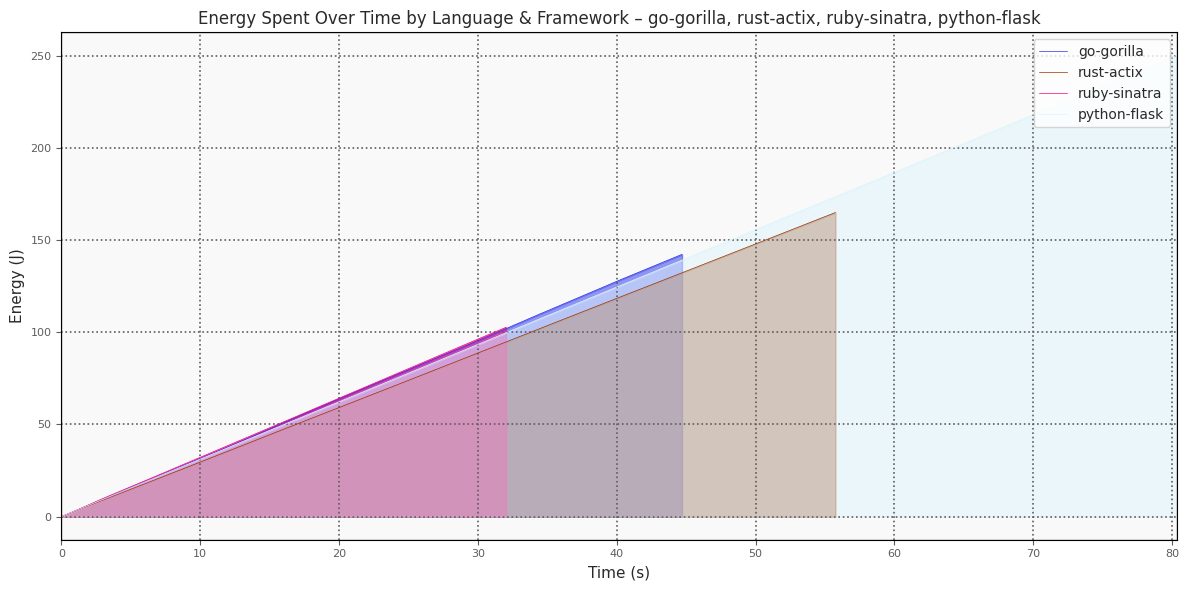

In [187]:
metric = 'cumulative_energy'  # Define the metric to compare - possible: 'power' & 'cumulative_energy'

# Plot cumulative energy consumption for both services
fig, ax = plt.subplots(figsize=(12, 6), facecolor='white')
fig.patch.set_facecolor('#FFFFFF')
ax.set_facecolor('#F9F9F9')

# Define colors for each service
colors = ['#2933EB', '#993200', '#FF007E', '#DCF5FB']  # Blue for python-flask, Brown for go-gorilla
alphas = [0.5, 0.5, 0.5, 0.5]  # Transparency for filled areas

# determine line alpha based on metric
if metric == 'power':
    line_alpha = 0.65
else:  
    line_alpha = 1.0

# Plotting cumulative energy with fill_between
for i, service in enumerate(SERVICES):
    filtered_data = reindexed_data_dict[service] # [data_dict[service]['iteration'] == 2]
    ax.plot(
        filtered_data.index,
        filtered_data[metric],
        linewidth=0.5,
        color=colors[i],
        label=service,
        alpha=line_alpha
    )
    if metric == 'cumulative_energy':
        ax.fill_between(
            filtered_data.index,
            filtered_data[metric],
            color=colors[i],
            alpha=alphas[i]
        )
        
# Customize grid, labels, etc.
ax.grid(True, linestyle='dotted', linewidth=1.2, color=tick_color)
title, x_label, y_label = define_title_xlable_ylable_line_chart(metric)
ax.set_title(f'{title} – {", ".join(SERVICES)}', color=labels_fontcolor, fontsize=title_fontsize)
ax.set_xlabel(f"{x_label}", color=labels_fontcolor, fontsize=labels_fontsize)
ax.set_ylabel(f"{y_label}", color=labels_fontcolor, fontsize=labels_fontsize)
ax.tick_params(labelsize=8, color=tick_color, labelcolor=tick_color)
ax.autoscale(enable=True, axis="x", tight=True)

# Adding a border around the plot area (axes)
border = Rectangle(
    (0, 0), 1, 1,
    transform=ax.transAxes,
    facecolor='none',
    edgecolor=tick_color,
    linewidth=1
)
ax.add_patch(border)

# Add legend to distinguish between the services
ax.legend(loc='upper right', fontsize=10, labelcolor=labels_fontcolor, facecolor="white", framealpha=0.8)

plt.tight_layout()
plt.show()

In [188]:
# Save the plot
save_plot(fig, f'{"_".join(SERVICES)}_line_chart', plot_type="compare-berries", filename_suffix=metric)

Plot for go-gorilla_rust-actix_ruby-sinatra_python-flask_line_chart (compare-berries) saved as cumulative_energy at plots/compare-berries


---
### Boxplot: Boxplot for Power Consumption Comparison Across Applications

* plots a boxplot for power consumption comparison across applications.
* Define the services to compare 
* Define the metric to analyse `power`, `delta`, `energy`

/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_63120/175798940.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  service_metric_data = df_service.groupby('iteration').apply(lambda group: group['timestamp'].iloc[-1] - group['timestamp'].iloc[0])
/var/folders/gb/tnf1yptj0gl7g0718ztgp6340000gn/T/ipykernel_63120/175798940.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  service_metric_data = 

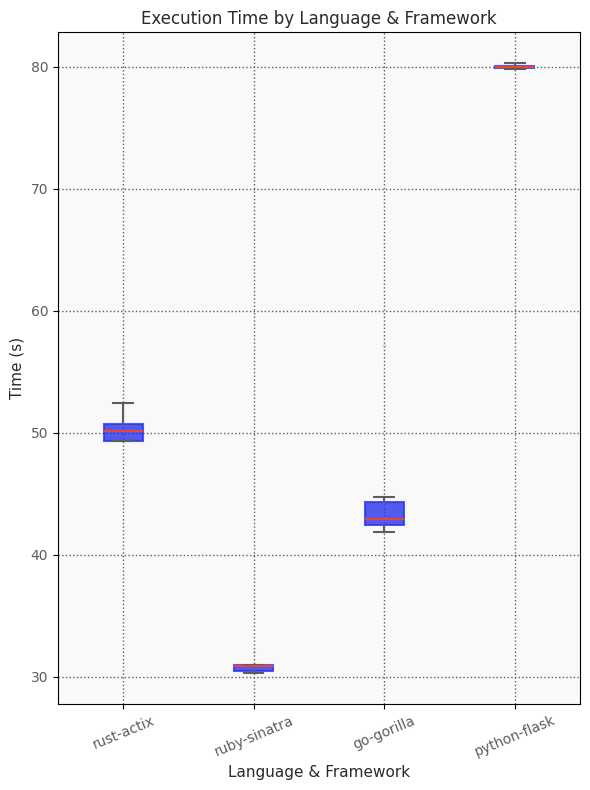

In [197]:
# Define services and endpoints
services = ['rust-actix', 'ruby-sinatra', 'go-gorilla', 'python-flask']  # Define services to compare
metric = 'running_time'  # power, energy, running_time 

# Prepare data for plotting
grouped_data = []
labels = []
group_colors = ['#2933EB', '#2933EB']  # Colors for the services (blue, green) currently
median_color = "#EB4532"
legend_labels = services 

for service in services:
    # grouping 
    df_service = data_dict[service]
    if metric == 'energy':
        service_metric_data = df_service.groupby('iteration')['cumulative_energy'].last()
    if metric == 'running_time':
        service_metric_data = df_service.groupby('iteration').apply(lambda group: group['timestamp'].iloc[-1] - group['timestamp'].iloc[0])
    else: 
        service_metric_data = df_service[metric].dropna() 
    grouped_data.append(service_metric_data)
    labels.append(service)

# Plotting
fig, ax = plt.subplots(figsize=(6, 8), facecolor='white')
ax.set_facecolor('#F9F9F9')

# Box plot
bplot = ax.boxplot(
    grouped_data,
    patch_artist=True,
    widths=0.3,
    labels=labels,
    flierprops=flierprops
)

for i, patch in enumerate(bplot['boxes']):
    patch.set(facecolor=group_colors[i % 2], alpha=0.8)  # Alternate colors for services
    patch.set(color=group_colors[i % 2], linewidth=1.5)
    patch.set(linewidth=1.5)  # Set border width
    
customize_boxplot(bplot, group_colors, tick_color, median_color)

# Set title and labels
title, x_label, y_label = define_title_xlable_ylable_boxplot(metric)
ax.set_title(f'{title}', color=labels_fontcolor, fontsize=title_fontsize)
ax.set_ylabel(f'{y_label}', color=labels_fontcolor, fontsize=labels_fontsize)
ax.set_xlabel(f'{x_label}', color=labels_fontcolor, fontsize=labels_fontsize)

# Customize tick labels
ax.tick_params(axis='x', labelsize=10, rotation=22.5, labelcolor='#5D5D5D')
ax.tick_params(axis='y', labelsize=10, labelcolor='#5D5D5D')
ax.grid(True, linestyle='dotted', linewidth=1.0, color=tick_color)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color, alpha=0.8) for color in group_colors]
# ax.legend(handles, legend_labels, loc='upper right', fontsize=10)

# Optional set y-axis limits for better visualization
# ax.set_ylim(2.8, 3.5)

# Show the plot
plt.tight_layout()
plt.show()


In [190]:
# save the plot
save_plot(fig, f'{"_".join(services)}_boxplot', plot_type="compare-berries", filename_suffix=metric)

Plot for rust-actix_ruby-sinatra_go-gorilla_python-flask_boxplot (compare-berries) saved as running_time at plots/compare-berries


---
### Table: Final Energy Consumption for Each Application
* Calculate the final energy consumption for each application all metrics
* calculte min, q1, median, q3, max, arithmetic mean, std

In [199]:
# calculate min, q1, median, q3, max, arithmetic mean, std
final_results = {}

for service in SERVICES:
    # Extract cumulative_energy for the last value in each iteration
    df_service = data_dict[service]
    final_energy = df_service.groupby('iteration')['cumulative_energy'].last()

    # Calculate the required statistics
    statistics = {
        "min (q0)": final_energy.min(),
        "q1": final_energy.quantile(0.25),
        "median (q2)": final_energy.median(),
        "q3": final_energy.quantile(0.75),
        "max (q4)": final_energy.max(),
        "mean (μ)": final_energy.mean(),
        "std (σ)": final_energy.std(),
    }
    final_results[service] = statistics

final_results_df = pd.DataFrame(final_results)
print(final_results_df)
    

             go-gorilla  rust-actix  ruby-sinatra  python-flask
min (q0)     133.524880  146.266475     97.393827    249.140926
q1           135.637783  146.318845     98.064332    249.380382
median (q2)  136.778225  148.900419     99.006447    249.829300
q3           141.317869  150.192956     99.340941    250.236643
max (q4)     180.938959  164.892158    102.648936    250.891938
mean (μ)     142.079641  150.616312     99.070056    249.889544
std (σ)       14.843515    6.034353      1.532812      0.583482


---
### Confidence Interval: Power Consumption Comparison Across Applications

In [191]:
from scipy.stats import t

df_application = grouped_data[3]

# Perform a confidence interval test
mean = df_application.mean()
std_dev = df_application.std()
n = len(df_application)
confidence_level = 0.9
degrees_freedom = n - 1
critical_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)

# Margin of error
margin_of_error = critical_value * (std_dev / (n ** 0.5))

# Confidence Interval
lower_bound = mean - margin_of_error
upper_bound = mean + margin_of_error

print(f"Mean: {mean}")
print(f"95% Confidence Interval: [{lower_bound}, {upper_bound}]")

Mean: 80.03853551546733
95% Confidence Interval: [79.9408550987087, 80.13621593222597]


In [192]:
import numpy as np

# Desired margin of error (e.g., 0.1, adjust as needed)
desired_margin_of_error = 0.1

# Calculate the required sample size
required_sample_size = (critical_value * std_dev / desired_margin_of_error) ** 2
required_sample_size = np.ceil(required_sample_size)  # Round up to the next whole number

print(f"Mean: {mean}")
print(f"95% Confidence Interval with current data: [{mean - margin_of_error}, {mean + margin_of_error}]")
print(f"Desired Margin of Error: {desired_margin_of_error}")
print(f"Required Sample Size (number of iterations): {required_sample_size}")

Mean: 80.03853551546733
95% Confidence Interval with current data: [79.9408550987087, 80.13621593222597]
Desired Margin of Error: 0.1
Required Sample Size (number of iterations): 9.0


* make a good story!!!

* running os + docker 
* only the application takes - this amount!
* related work suggested - there not very close but in ours it is close 
* A real application behave not as drastic difference 

* Massage the question so we don't know what we are talking about!
* what we generate is the truth! 
* suprising result is always future work! 

* popular belelive of complied languages -
* Dreading interpraped langues -

* write down the goal of this thsis:
* Is it possible to compare them and fair? 

* Case repo pops up - keep contact! 
* Go to the first step in the direction - 